## Denoising the Image Dataset using Autoencoder
**What is Noise?**
*  Noise refers to random variations such as uneven brightness or color information mainly caused by image acquisition or processing. It appears as grainy patterns which can reduce the overall image quality.

In [ ]:
import numpy as np       #Importing all the necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [ ]:

 (x_train, _), (x_test, _) = mnist.load_data()    #Loading the MNIST dataset

**Normalization**
* Normalization is required for scaling the values of data to a specific range such as to [0,1]. In this case, we scaling our image pixel values from original range of [0,255] to range of [0,1].



In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

**Reshaping**
* We reshape our input in the form of (batch_size, height, width, channels) which is a 4D array to meet the requirement of Convolutional Neural Networks(CNNs). Basically we are ensuring that our input is compatible with CNNs.



In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)
# x_train[10]

(60000, 28, 28, 1)
(10000, 28, 28, 1)


We are adding Artifical Noise element-wise to the original images. Also the noise being added is **Gaussian Noise** as we're using np.random.normal to generate random values.


In [ ]:
arti_noise = 0.5
x_train_noise = x_train + arti_noise * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)   #The mean (loc) of the distribution is 0.0.
x_test_noise = x_test + arti_noise * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)      #The standard deviation (scale) of the distribution is 1.0.
print(x_train_noise.shape)
print(x_test_noise.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Now we will perform the clipping all pixel values in x_train_noise and x_test_noise are within the range [0.0, 1.0].

In [ ]:
x_train_noise = np.clip(x_train_noise.astype(np.float32), 0.0, 1.0)
x_test_noise = np.clip(x_test_noise.astype(np.float32), 0.0, 1.0)

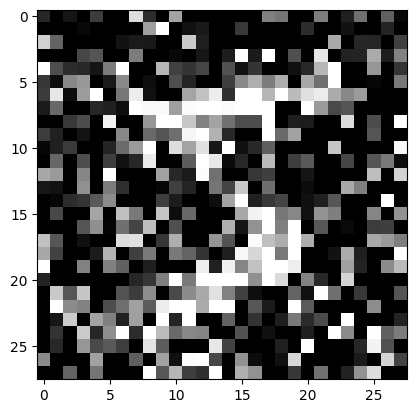

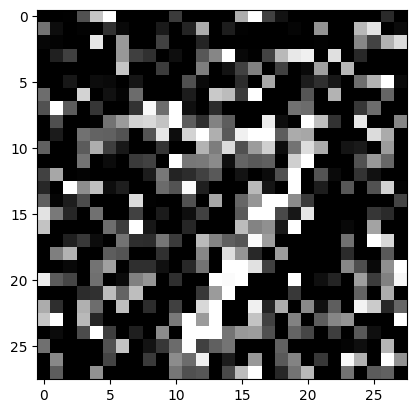

In [ ]:
plt.imshow(x_train_noise[0], cmap = 'gray')             # This function from Matplotlib is used to display an image in grayscale.
plt.show()
plt.imshow(x_test_noise[0], cmap = 'gray')
plt.show()

This code creates a single row of nine noisy images from the x_train_noise dataset so that we can compare the images side to side.

<function matplotlib.pyplot.show(close=None, block=None)>

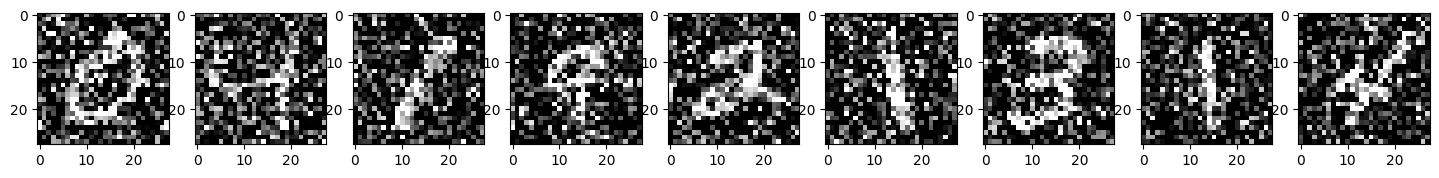

In [ ]:
plt.figure(figsize=(20, 20))    # Assigning size to the display image
for i in range(1, 10) :
  ax = plt.subplot(1, 10, i)
  plt.imshow(x_train_noise[i].reshape(28, 28), cmap ='gray')
plt.show

#Autoencoder#
* It comprises of Encoder and Decoder for feature learning and data compression.Here I used it for Denoising the image dataset.
* **Encoder:** Input data is cnverted into Latent Space by compressing input data into lower-dimensional representation. Then we extract important features such as edges and textures and then encode it.
* **Decoder:** The decoder reconstructs the original data from the compressed representation. Its goal is to produce an output that is as close as possible to the original input data. The output of the decoder is compared to the original clean data to compute the loss.



In [ ]:
model = Sequential()
# Encoder:-
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2, 2), padding = 'same'))


In [ ]:
# Decoder:-
model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation = 'relu', padding = 'same'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_14 (UpSampling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_15 (UpSampling2D)      │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

Training of data take place through 10 epochs.

In [ ]:
model.fit(x_train_noise, x_train, epochs = 10, batch_size = 256, shuffle=True, validation_data=(x_test_noise, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 110s 461ms/step - loss: 0.2118 - val_loss: 0.1549
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 460ms/step - loss: 0.1532 - val_loss: 0.1468
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 457ms/step - loss: 0.1586 - val_loss: 0.1452
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 468ms/step - loss: 0.1576 - val_loss: 0.1429
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 454ms/step - loss: 0.1411 - val_loss: 0.1682
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 456ms/step - loss: 0.1493 - val_loss: 0.1339
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 456ms/step - loss: 0.2864 - val_loss: 0.1559
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 455ms/step - loss: 0.1528 - val_loss: 0.1425
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 453ms/step - loss: 0.1437 - val_loss: 0.1600
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 453ms/step - loss: 0.1454 - val_loss: 0.1381


Final Output depicting corrupted testing data and predicted(denoised) images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


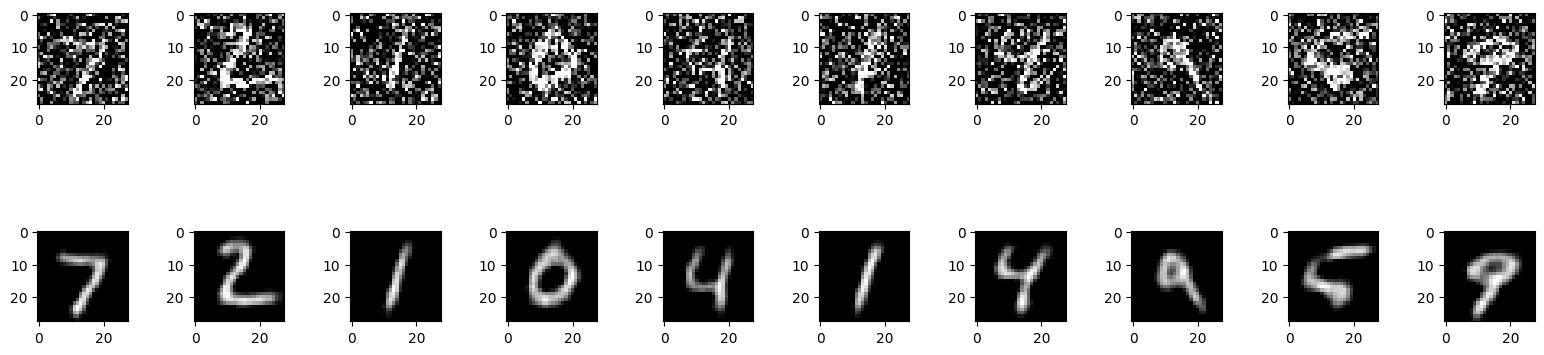

In [ ]:
no_noise_img = model.predict(x_test)
plt.figure(figsize=(40, 4))
for i in range(10) :
  ax = plt.subplot(3, 20, i + 1)
  plt.imshow(x_test_noise[i].reshape(28, 28), cmap = 'gray')

  ax = plt.subplot(3, 20, 40+i+1)
  plt.imshow(no_noise_img[i].reshape(28, 28), cmap = 'gray')

plt.show()

Finally We get the Accuracy Score for Denoising image with the help of Autoencoder.

In [ ]:
from sklearn.metrics import accuracy_score

no_noise_img = model.predict(x_test_noise)

y_pred_binary = (no_noise_img > 0.5).astype(np.uint8)

x_test_binary = (x_test > 0.5).astype(np.uint8)

y_pred_flat = y_pred_binary.flatten()
x_test_flat = x_test_binary.flatten()

accuracy = accuracy_score(x_test_flat, y_pred_flat)

print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Accuracy: 94.85%
